**SYPA: Fundamental Analysis of Foreign Direct Investment** <br>
*4_Model_Selection* <br>
Harvard SYPA <br>
User: Jake Schneider <br>
Date Created: February 29, 2020 <br>
Date Updated: March 7, 2020

----

**Model Selection Strategy** <br>
1. Lasso <br>
2. Random Forest <br>
3. Neural Networks

**Load Packages**

In [1]:
#Import libraries
import sys
import pandas as pd
from datetime import date, datetime, time, timedelta
import pendulum
import json
import requests
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', context='talk')

import pickle

from matplotlib.offsetbox import AnchoredText
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 

import statsmodels.formula.api as sm
from pprint import pprint

import warnings
import itertools

import missingno as msno

from flask import jsonify, make_response

from varname import varname

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF
from PIL import Image, ImageDraw, ImageFont

----

**Load Data**

In [2]:
## Load Unimputed Data
#
#analysis_df = pd.read_csv('../../2_Inputs/Final/analysis_df.csv')
#analysis_df = analysis_df.drop(["Unnamed: 0"], axis = 1)
#analysis_df.head()

In [3]:
## Create year variable
#
#analysis_df['year'] = analysis_df['date']
#analysis_df.head()

In [4]:
## Print Shape
#
#analysis_df.shape

In [5]:
## Check for variables with all NAs
#
#analysis_df = analysis_df.dropna(axis=1, how='all')
#analysis_df.shape

In [6]:
## Output to CSV
#
#analysis_df.to_csv('../../2_Inputs/Final/analysis_df.csv')

In [7]:
# Load Data

final_df = pd.read_csv('../../2_Inputs/Final/final_df_knn.csv')
final_df = final_df.drop(["Unnamed: 0"], axis = 1)
final_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,1970.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.003300,8.3546,-23616.0,43.52,37.409,7.45,2.631613,29.48,-0.979531,1970.0
1,Afghanistan,1971.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.201934,8.5824,-22903.2,43.88,37.930,7.45,2.635235,29.68,-0.956633,1971.0
2,Afghanistan,1972.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,72.199611,8.7142,-20000.0,26.32,38.461,7.45,2.627456,26.70,-1.043920,1972.0
3,Afghanistan,1973.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.824106,6.7992,-14881.2,35.16,39.003,7.45,2.609505,27.00,-0.792020,1973.0
4,Afghanistan,1976.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,77.278710,4.2436,-261777.8,38.10,40.715,7.45,2.558353,28.06,-0.555133,1976.0


In [8]:
## Create year variable
#
#final_df['year'] = final_df['date']
#final_df.head()

In [9]:
## Drop Potentially Confounding FDI Variables
#
#final_df = final_df.drop(columns = ['Foreign direct investment, net (BoP, current US$)', 
#                                     'Foreign direct investment, net inflows (BoP, current US$)', 
#                                     'Foreign direct investment, net outflows (% of GDP)', 
#                                     'Foreign direct investment, net outflows (BoP, current US$)', 
#                                     'Foreign.direct.investment..net.inflows.in.reporting.economy..DRS..current.US..'])

In [10]:
## Drop annoying index variables
#
#final_df = final_df.drop(final_df.columns[[0, 10]], axis=1)
#final_df.loc[:, 'country':'longitude'].head()

In [11]:
# Print Shape

final_df.shape

(7383, 2316)

In [12]:
## Output to CSV
#
#final_df.to_csv('../../2_Inputs/Final/final_df_knn.csv')

---

**Split Data into In-Sample and Lock Box**

In [13]:
## Use Train Test Split to randomly choose lockbox and insample
#
#in_sample, lock_box = train_test_split(final_df, test_size=0.20, random_state=13)

In [14]:
## View in_sample
#
#in_sample.head()

In [15]:
## In_sample shape
#
#in_sample.shape

In [16]:
## View Lock_box
#
#lock_box.head()

In [17]:
## Lock_box dimensions
#
#lock_box.shape

In [18]:
## Output Lock_box and in_sample to CSV
#
#in_sample.to_csv('../../2_Inputs/Final/in_sample.csv')
#lock_box.to_csv('../../2_Inputs/Final/lock_box.csv')

In [19]:
## Create in-sample 1
#
#in_sample1 = analysis_df[analysis_df['date'] <= 2014]
#print("In-sample Dimensions:", in_sample1.shape)
#print(in_sample1['date'].describe())
#in_sample1.to_csv('../../2_Inputs/Final/in_sample1.csv')
#in_sample1.head()

In [20]:
# Create in-sample

in_sample = final_df[final_df['date'] <= 2014]
print("In-sample Dimensions:", in_sample.shape)
print(in_sample['date'].describe())
in_sample.to_csv('../../2_Inputs/Final/in_sample.csv')
in_sample.head()

In-sample Dimensions: (6626, 2316)
count    6626.000000
mean     1995.418654
std        12.181202
min      1970.000000
25%      1986.000000
50%      1997.000000
75%      2006.000000
max      2014.000000
Name: date, dtype: float64


,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,1970.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.003300,8.3546,-23616.0,43.52,37.409,7.45,2.631613,29.48,-0.979531,1970.0
1,Afghanistan,1971.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.201934,8.5824,-22903.2,43.88,37.930,7.45,2.635235,29.68,-0.956633,1971.0
2,Afghanistan,1972.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,72.199611,8.7142,-20000.0,26.32,38.461,7.45,2.627456,26.70,-1.043920,1972.0
3,Afghanistan,1973.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.824106,6.7992,-14881.2,35.16,39.003,7.45,2.609505,27.00,-0.792020,1973.0
4,Afghanistan,1976.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,77.278710,4.2436,-261777.8,38.10,40.715,7.45,2.558353,28.06,-0.555133,1976.0


In [21]:
## Create Lock Box
#
#lock_box1 = analysis_df[analysis_df['date'] > 2014]
#print("Lock Box Dimensions:", lock_box1.shape)
#print(lock_box1['date'].describe())
#lock_box1.to_csv('../../2_Inputs/Final/lock_box1.csv')
#lock_box1.head()

In [22]:
# Create Lock Box

lock_box = final_df[final_df['date'] > 2014]
print("Lock Box Dimensions:", lock_box.shape)
print(lock_box['date'].describe())
lock_box.to_csv('../../2_Inputs/Final/lock_box.csv')
lock_box.head()

Lock Box Dimensions: (757, 2316)
count     757.000000
mean     2016.486129
std         1.118096
min      2015.000000
25%      2015.000000
50%      2016.000000
75%      2017.000000
max      2018.000000
Name: date, dtype: float64


,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
22,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,57.110746,1.679,-16498.2,28.60,63.3770,4.9760,2.478662,24.50,-1.117563,2015.0
23,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,58.104539,1.634,-16498.2,29.50,63.7630,4.8000,2.519923,25.64,-1.039843,2016.0
24,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.008129,1.559,-314602.0,29.80,64.1300,4.6330,2.554251,22.98,-0.992470,2017.0
25,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.244647,1.542,-32328.2,27.96,63.3522,4.9862,2.584927,25.86,-0.994720,2018.0
49,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,...,73.166459,17.080,-131596.4,6.00,78.0250,1.6770,12.626548,17.16,0.157149,2015.0


----

**Model Selection**

*Prerequisites*

In [23]:
# Create Xs and Y

Xs = in_sample.drop(in_sample[['country', 'date', 'code', 'iso2Code', 'region', 'adminregion',
                      'incomeLevel', 'lendingType', 'capitalCity',
                      'Foreign direct investment, net inflows (% of GDP)']], axis = 1)
y = in_sample['Foreign direct investment, net inflows (% of GDP)'].values.reshape(-1,1)

In [24]:
# View Shapes Xs

print("Xs:", Xs.shape)
print("Y:", y.shape)

Xs: (6626, 2306)
Y: (6626, 1)


In [25]:
# Create Table For Storing Best Results

results = pd.DataFrame(columns = ['Model Name', 'Model Type', 'Minimum RMSE', 'Variables']) #'Accuracy', #'Maximum R2',
#results

*Linear Models* <br>
Docs: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8 <br>
GridSearch: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html <br>
Variable Selection: https://datascienceplus.com/lasso-regression-in-python/ <br>

In [26]:
# See potential scoring metrics

#metrics.SCORERS.keys()

In [27]:
#Multivariate Regression

reg = LinearRegression()

reg_MSEs = cross_val_score(reg, Xs, y, scoring = 'neg_root_mean_squared_error', cv = 5)
#reg_accuracy = cross_val_score(reg, Xs, y, scoring = 'accuracy', cv = 5)
#reg_r2 = cross_val_score(reg, Xs, y, scoring = 'r2', cv = 5)

print("Test MSEs: \n", -reg_MSEs)
#print("Test Accuracy: \n", reg_accuracy)
#print("Test R2s: \n", reg_r2)

mean_reg_MSEs = np.mean(-reg_MSEs)
print("\nMean Test MSE from 5-Fold CV:", mean_reg_MSEs)

#mean_reg_accuracy = np.mean(reg_accuracy)
#print("\nMean Test Accuracy from 5-Fold CV:", mean_reg_accuracy)

#mean_reg_r2 = np.mean(reg_r2)
#print("Mean Test R2 from 5-Fold CV:", mean_reg_r2)

reg_results = pd.DataFrame({'Model Name': 'Linear Regression', 
                    'Model Type': 'Linear Model', 
                    #'Accuracy': [round(mean_reg_accuracy, 2)],        
                    'Minimum RMSE': [round(mean_reg_MSEs, 2)], 
                    #'Maximum R2': [round(mean_reg_r2, 2)], 
                    'Variables': [len(Xs.columns)]})

results = results.append(reg_results)
print("\nResults Dataframe: \n", results)

Test MSEs: 
 [9.69601157e+01 5.82354606e+01 9.45124063e+05 5.94838290e+01
 1.83348477e+05]

Mean Test MSE from 5-Fold CV: 225737.44374296736

Results Dataframe: 
           Model Name    Model Type  Minimum RMSE Variables
0  Linear Regression  Linear Model     225737.44      2306


In [28]:
#Ridge Regression

rmse_ridge = np.sqrt(-cross_val_score(Ridge(tol = 1, max_iter = 100), Xs, y, scoring="neg_mean_squared_error", cv = 5))
print("Test RMSEs: \n", rmse_ridge)

alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, Xs, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

cv_rmse_ridge = [rmse_cv(Ridge(alpha = alpha, tol = 1, max_iter = 100)).mean() 
            for alpha in alphas]

cv_rmse_ridge = pd.Series(cv_rmse_ridge, index = alphas)
print("\nCross-Validated RMSEs:\n", cv_rmse_ridge)
print("Minimum Ridge RMSE:", round(cv_rmse_ridge.min(), 2))

#def accuracy_cv(model):
#    accuracy = cross_val_score(model, Xs, y, scoring="accuracy", cv = 5)
#    return(accuracy)
#
#cv_accuracy_ridge = [accuracy_cv(Ridge(alpha = alpha)).mean() 
#            for alpha in alphas]
#
#cv_accuracy_ridge = pd.Series(cv_accuracy_ridge, index = alphas)
#print("\nCross-Validated Accuracy:\n", cv_accuracy_ridge)
#print("Maximum Ridge Accuracy:", round(cv_accuracy_ridge.max(), 2))

Test RMSEs: 
 [6.21447615e+01 5.59964810e+01 1.30132457e+06 5.09118105e+01
 2.75287723e+07]

Cross-Validated RMSEs:
 1.000000e-15    5.344034e+06
1.000000e-10    5.344034e+06
1.000000e-08    5.344027e+06
1.000000e-04    5.296301e+06
1.000000e-03    5.261368e+06
1.000000e-02    5.475822e+06
1.000000e+00    5.766053e+06
5.000000e+00    5.558587e+06
1.000000e+01    5.338780e+06
2.000000e+01    4.976174e+06
5.000000e+01    4.176636e+06
1.000000e+02    3.315629e+06
2.000000e+02    2.369792e+06
5.000000e+02    1.320499e+06
1.000000e+03    8.000225e+05
2.000000e+03    4.859632e+05
dtype: float64
Minimum Ridge RMSE: 485963.19


In [29]:
# Store Ridge Results

optimum_ridge = RidgeCV(alphas = [500]).fit(Xs, y)
optimum_ridge.coef_[0]

coef = pd.Series(optimum_ridge.coef_[0], index = Xs.columns) 
print("Ridge Coefficients:\n",coef.head())

ridge_results = pd.DataFrame({'Model Name': 'Ridge Regression', 
                    'Model Type': 'Linear Model', 
                    #'Accuracy': [round(cv_accuracy_ridge.max(), 2)],
                    'Minimum RMSE': [round(1.320499e+06, 2)], 
                    #'Maximum R2': [np.max(ridge_r2)], 
                    'Variables': [np.sum((coef != 0))]})

results = results.append(ridge_results)
print("\nResults Dataframe:\n", results)

Ridge Coefficients:
 longitude                                                                   -0.007254
latitude                                                                    -0.332452
2005 PPP conversion factor, GDP (LCU per international $)                    0.079155
2005 PPP conversion factor, private consumption (LCU per international $)   -0.026034
Access to clean fuels and technologies for cooking (% of population)        -0.089368
dtype: float64

Results Dataframe:
           Model Name    Model Type  Minimum RMSE Variables
0  Linear Regression  Linear Model     225737.44      2306
0   Ridge Regression  Linear Model    1320499.00      2304


In [30]:
# See year weight

print("Ridge Coefficients:\n",coef.tail())
print("\nTop Coefficients:\n", coef.nlargest(10))

Ridge Coefficients:
 Fertility.rate..total..births.per.woman.                       -1.596393
Population.ages.65.and.above....of.total.population.            0.554769
Unmet.need.for.contraception....of.married.women.ages.15.49.    0.224367
Voice.and.Accountability..Estimate.y                            0.126510
year                                                           -0.524256
dtype: float64

Top Coefficients:
 GDP (constant LCU)                                                    4.937500
GDP (current LCU)                                                     4.703125
GDP: linked series (current LCU)                                      3.687500
Gross domestic income (constant LCU)                                  3.625000
Final consumption expenditure (constant LCU)                          3.531250
Households and NPISHs Final consumption expenditure (constant LCU)    3.500000
GNI (current LCU)                                                     3.343750
Gross national expenditure

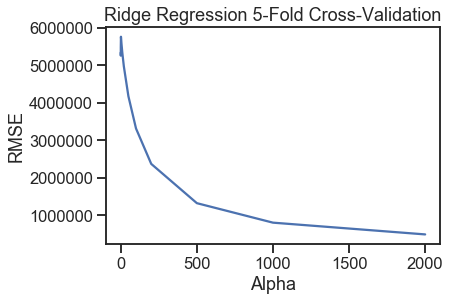

In [31]:
# Plot Ridge Regression

cv_rmse_ridge.plot(title = "Ridge Regression 5-Fold Cross-Validation")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.plot()
#sns.despine()
plt.savefig('../../3_Outputs/Model Selection/Ridge Regression/Ridge Regression CV RMSE Plot.jpg', bbox_inches = 'tight')

In [32]:
##Ridge Regression 2
#
#ridge = Ridge()
#
#parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50, 100]}
#
#ridge_regressor_MSE = GridSearchCV(ridge, parameters, scoring='neg_root_mean_squared_error', cv = 5, verbose = 1, n_jobs = 2)
#ridge_regressor_r2 = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5, verbose = 1, n_jobs = 2)
#
#
#ridge_MSEs = ridge_regressor_MSE.fit(Xs, y)
#ridge_r2 = ridge_regressor_r2.fit(Xs, y)
#
#print("Test MSEs: \n", ridge_MSEs)
#print("Test R2s: \n", ridge_r2)
#
#print("\nMSE Ridge Regressor Best Parameters:", ridge_regressor_MSE.best_params_)
#print("MSE Ridge Regressor Best Score:", ridge_regressor_MSE.best_score_)
#
#
#print("\nR2 Ridge Regressor Best Parameters:", ridge_regressor_r2.best_params_)
#print("R2 Ridge Regressor Best Score:", ridge_regressor_r2.best_score_)
#
#
#ridge_results = pd.DataFrame({'Model Name': 'Ridge Regression', 
#                    'Model Type': 'Linear Model', 
#                    'Best MSE': [np.max(ridge_MSEs)], 
#                    'Best R2': [np.max(ridge_r2)], 
#                    #'Variables': [np.sum(ridge_regressor_MSE.coef_ != 0)]})
#
#results = results.append(ridge_results)
#print("\nResults Dataframe:", results)

In [33]:
#Lasso Regression

rmse_lasso = np.sqrt(-cross_val_score(Lasso(tol = 1, max_iter = 100), Xs, y, scoring="neg_mean_squared_error", cv = 5))
print("Test RMSEs: \n", rmse_lasso)

alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50, 100, 200, 500, 1000]

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, Xs, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

cv_rmse_lasso = [rmse_cv(Lasso(alpha = alpha, tol = 1, max_iter = 100)).mean() 
            for alpha in alphas]

cv_rmse_lasso = pd.Series(cv_rmse_lasso, index = alphas)
print("\nCross-Validated RMSEs:\n", cv_rmse_lasso)
print("Minimum Lasso RMSE:", round(cv_rmse_lasso.min(), 2))

#def accuracy_cv(model):
#    accuracy = cross_val_score(model, Xs, y, scoring="accuracy", cv = 5)
#    return(accuracy)
#
#cv_accuracy_lasso = [accuracy_cv(Lasso(alpha = alpha)).mean() 
#            for alpha in alphas]
#
#cv_accuracy_lasso = pd.Series(cv_accuracy_lasso, index = alphas)
#print("\nCross-Validated Accuracy:\n", cv_accuracy_lasso)
#print("Maximum Ridge Accuracy:", round(cv_accuracy_lasso.max(), 2))

Test RMSEs: 
 [4.81537389e+01 2.70429526e+01 5.16928654e+01 2.49989210e+01
 1.57529388e+05]

Cross-Validated RMSEs:
 1.000000e-15    27440.181382
1.000000e-10    27440.181381
1.000000e-08    27440.181247
1.000000e-04    27438.828749
1.000000e-03    27428.986086
1.000000e-02    27416.491938
1.000000e+00    31536.255215
5.000000e+00    16551.441991
1.000000e+01    11275.742882
2.000000e+01     9089.163579
5.000000e+01    15860.424893
1.000000e+02    15691.137297
2.000000e+02     8671.058714
5.000000e+02       35.195922
1.000000e+03       34.131217
dtype: float64
Minimum Lasso RMSE: 34.13


In [34]:
# Store Lasso Results

optimum_lasso = LassoCV(alphas = [500], tol = 1).fit(Xs, y) #Change optimum
#print(optimum_lasso.coef_)

coef = pd.Series(optimum_lasso.coef_, index = Xs.columns) 
print("\nLasso Coefficients:\n",coef.head(100))

lasso_results = pd.DataFrame({'Model Name': 'Lasso Regression', 
                    'Model Type': 'Linear Model',
                    #'Accuracy': [round(cv_accuracy_lasso.max(), 2)],
                    'Minimum RMSE': [round(35.195922, 2)], 
                    #'Maximum R2': [np.max(ridge_r2)], 
                    'Variables': [np.sum((coef != 0))]})

results = results.append(lasso_results)
print("\nResults Dataframe:\n", results)

results.to_csv('../../3_Outputs/Model Selection/Validation Table/Validation Table.csv')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Lasso Coefficients:
 longitude                                                                   -0.000000e+00
latitude                                                                     0.000000e+00
2005 PPP conversion factor, GDP (LCU per international $)                   -0.000000e+00
2005 PPP conversion factor, private consumption (LCU per international $)   -0.000000e+00
Access to clean fuels and technologies for cooking (% of population)         0.000000e+00
                                                                                 ...     
Arable land (hectares)                                                      -1.121814e-08
ARI treatment (% of children under 5 taken to a health provider)             0.000000e+00
Armed forces personnel (% of total labor force)                             -0.000000e+00
Armed forces personnel, total                                                2.620988e-07
Arms exports (SIPRI trend indicator values)                                 -1

In [35]:
# See year weight

print("Ridge Coefficients:\n",coef.tail())
print("\nTop Coefficients:\n", coef.nlargest(10))

Ridge Coefficients:
 Fertility.rate..total..births.per.woman.                       -0.0
Population.ages.65.and.above....of.total.population.            0.0
Unmet.need.for.contraception....of.married.women.ages.15.49.   -0.0
Voice.and.Accountability..Estimate.y                            0.0
year                                                            0.0
dtype: float64

Top Coefficients:
 Battle-related deaths (number of people)                                                   0.002120
Current health expenditure per capita, PPP (current international $)                       0.001892
Cereal yield (kg per hectare)                                                              0.001161
Presence of peace keepers (number of troops, police, and military observers in mandate)    0.001002
Current health expenditure per capita (current US$)                                        0.000977
Secure Internet servers (per 1 million people)                                             0.000896
Indu

In [36]:
# Output Last Coefficients List

coef[coef != 0].to_csv('../../3_Outputs/Model Selection/Lasso Regression/lasso_optimum_coefficients.csv')

In [37]:
# save the model to disk

filename = '../../3_Outputs/Model Selection/Lasso Regression/lasso_optimum_model.sav'
pickle.dump(optimum_lasso, open(filename, 'wb'))

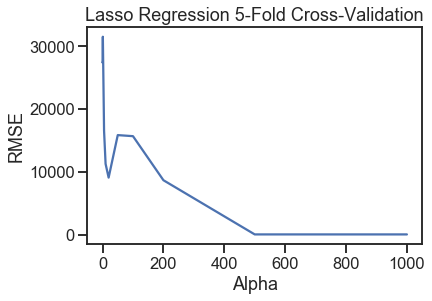

In [38]:
# Plot Lasso Regression

cv_rmse_lasso.plot(title = "Lasso Regression 5-Fold Cross-Validation")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
#plt.xscale('log')
plt.plot()
#sns.despine()
plt.savefig('../../3_Outputs/Model Selection/Lasso Regression/Lasso Regression CV RMSE Plot.jpg', bbox_inches = 'tight')

In [39]:
##Lasso Regression 2
#
#lasso = Lasso()
#
#parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50, 100]}
#
#lasso_regressor_MSE = GridSearchCV(lasso, parameters, scoring='neg_root_mean_squared_error', cv = 5, verbose = 1, n_jobs = 2)
#lasso_regressor_r2 = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5, verbose = 1, n_jobs = 2)
#
#
#lasso_MSEs = lasso_regressor_MSE.fit(Xs, y)
#lasso_r2 = lasso_regressor_r2.fit(Xs, y)
#
#print("Test Lasso MSEs: \n", lasso_MSEs)
#print("Test Lasso R2s: \n", lasso_r2)
#
#mean_lasso_MSEs = np.mean(lasso_MSEs)
#print("\nMean Lasso Test MSE from 5-Fold CV:", mean_lasso_MSEs)
#print("MSE Lasso Regressor Best Parameters:", lasso_regressor_MSE.best_params_)
#print("MSE Lasso Regressor Best Score:", lasso_regressor_MSE.best_score_)
#
#mean_lasso_r2 = np.mean(lasso_r2)
#print("Mean Lasso Test R2 from 5-Fold CV:", mean_lasso_r2)
#print("R2 Lasso Regressor Best Parameters:", lasso_regressor_r2.best_params_)
#print("R2 Lasso Regressor Best Score:", lasso_regressor_r2.best_score_)
#
#lasso_results = pd.DataFrame({'Model Name': 'Lasso Regression', 
#                    'Model Type': 'Linear Model', 
#                    'Best MSE': [np.max(lasso_MSEs)], 
#                    'Best R2': [np.max(lasso_r2)], 
#                    #'Variables': [np.sum(lasso_regressor_r2.coef_ != 0)]})
#
#results = results.append(lasso_results)
#print("\nResults Dataframe:", results)

*Pure Regression for Litmus Test*

In [40]:
## Linear Regression
#
#reg_full = reg.fit(Xs, y)
#print("R2 for Linear Model with All Variables: ", round(reg_full.score(Xs, y)*100, 2))

In [41]:
# Full Summary
# R2: 74.3
# Adjusted R2: 71.9

model = sm.ols(formula='y ~ Xs', data=in_sample)
results1 = model.fit()
print("R2:", round(results1.rsquared*100, 2))
print(results1.summary())

R2: 74.27


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     31.94
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:58:22   Log-Likelihood:                -29232.
No. Observations:                6626   AIC:                         5.956e+04
Df Residuals:                    6076   BIC:                         6.330e+04
Df Model:                         549                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0328      0.007     -4.738      0.0

In [42]:
print(Xs.iloc[:, [123, 128, 168, 177, 183, 212, 384, 459, 500, 504, 727, 755, 785, 862, 867, 872, 929, 964, 1104, 1105, 1122, 1143, 1199, 1200, 1204, 1231, 1360, 1528, 1546, 1567, 1681, 1682, 1980, 2071, 2185, 2186, 2187, 2193, 2203, 2210, 2228]].head(0))

Empty DataFrame
Columns: [Binding coverage, primary products (%), Bound rate, simple mean, all products (%), Children in employment, study and work (% of children in employment, ages 7-14), Children in employment, wage workers, male (% of male children in employment, ages 7-14), Children out of school, male (% of male primary school age), Commercial bank branches (per 100,000 adults), Energy imports, net (% of energy use), Fossil fuel energy consumption (% of total), GNI per capita, PPP (constant 2011 international $), GNI, PPP (current international $), Manufactures exports (% of merchandise exports), Merchandise imports (current US$), Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population), Net ODA provided to the least developed countries (% of GNI), Net ODA received (% of central government expense), Net official aid received (constant 2015 US$), Other taxes (% of revenue), Persistence to grade 5, male (% of cohort)

In [43]:
# Model 2: Most Correlated Variables

model2 = sm.ols(formula='y ~ Xs.iloc[: , [123, 128, 168, 177, 183, 212, 384, 459, 500, 504, 727, 755, 785, 862, 867, 872, 929, 964, 1104, 1105, 1122, 1143, 1199, 1200, 1204, 1231, 1360, 1528, 1546, 1567, 1681, 1682, 1980, 2071, 2185, 2186, 2187, 2193, 2203, 2210, 2228]]', data=in_sample)
results2 = model2.fit()
print("R2:", round(results2.rsquared*100, 2))
print(results2.summary())

R2: 6.17
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     10.56
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           1.94e-64
Time:                        10:58:22   Log-Likelihood:                -33518.
No. Observations:                6626   AIC:                         6.712e+04
Df Residuals:                    6584   BIC:                         6.741e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                         

*Tree Based* <br>
In 4b

*Neural Networks* <br>
In 4c

----

**Model Selection**

Choose best model in future workbooks.